In [1]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 6.4MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease

In [2]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm.notebook import tqdm
import pandas
import json
import pprint

In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [4]:
import pandas as pd
import io

In [5]:
df = pd.read_excel('articoli_primabergamo.xlsx')

In [6]:
"http://" + df['articolo'][0].replace("primabergamo.it", "", 1)

'http://primabergamo.it/cronaca/a-bergamo-lieve-calo-dei-contagi-338-in-piu-in-lombardia-boom-di-positivi-e-tamponi-analizzati/'

In [7]:
df.head()

,articolo,tipologia,viz,data,Cluster,articolo_pulito
0,primabergamo.itprimabergamo.it/cronaca/a-berga...,covid,86,2021-03-11 00:00:00,C9,a-bergamo-lieve-calo-dei-contagi-338-in-piu-in...
1,primabergamo.itprimabergamo.it/cronaca/aumenta...,covid,750,2021-03-11 00:00:00,C9,aumentano-i-contagi-nella-bergamasca-2-237-dal...
2,primabergamo.itprimabergamo.it/cronaca/contagi...,covid,137,2021-03-11 00:00:00,C3,contagi-ricoveri-incidenza-settimanale-rt-perc...
3,primabergamo.itprimabergamo.it/cronaca/in-lomb...,covid,387,2021-03-11 00:00:00,C9,in-lombardia-le-aziende-potranno-vaccinare-in-...
4,primabergamo.itprimabergamo.it/cronaca/rt-sopr...,covid,737,2021-03-11 00:00:00,C3,rt-sopra-1-25-e-310-contagi-ogni-100-mila-abit...


In [8]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("http://" + df['articolo'][0].replace("primabergamo.it", "", 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Populating the interactive namespace from numpy and matplotlib


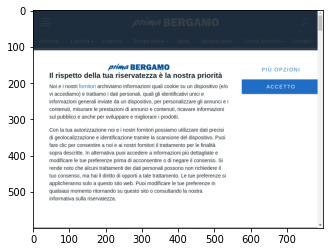

In [10]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [11]:
wd.find_elements_by_css_selector(".css-flk0bs")[0].click()

Populating the interactive namespace from numpy and matplotlib


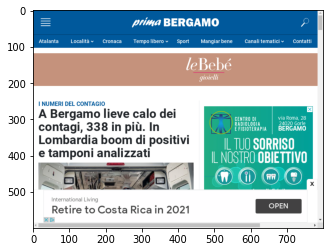

In [12]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [13]:
print(wd.title)

A Bergamo lieve calo dei contagi, 338 in più. In Lombardia boom di positivi e tamponi analizzati - Prima Bergamo


In [14]:
title = wd.find_elements_by_css_selector(".title")[0].text
print(title)

A Bergamo lieve calo dei contagi, 338 in più. In Lombardia boom di positivi e tamponi analizzati


In [15]:
text = wd.find_elements_by_css_selector(".post-content p")
print(text[0].text)

La Lombardia pare ormai destinata alla zona rossa e a parlare, da giorni ormai, sono i numeri. Scorrendo il bollettino diffuso oggi (giovedì 11 marzo) dal Pirellone si contano 5.849 nuovi positivi, di cui 197 debolmente positivi, a fronte del record di 62.222 tamponi analizzati. Di questi 43.790 sono test molecolari, mentre 18.432 sono test antigenici rapidi.


In [16]:
for t in text:
  print(t.text)

La Lombardia pare ormai destinata alla zona rossa e a parlare, da giorni ormai, sono i numeri. Scorrendo il bollettino diffuso oggi (giovedì 11 marzo) dal Pirellone si contano 5.849 nuovi positivi, di cui 197 debolmente positivi, a fronte del record di 62.222 tamponi analizzati. Di questi 43.790 sono test molecolari, mentre 18.432 sono test antigenici rapidi.
Ieri erano stati diagnosticati invece 4.422 contagi, grazie all’esecuzione di 55.535 test (molecolari e rapidi). Di conseguenza si impenna nuovamente l’indice di positività regionale, che passa dal 7,9 per cento di ieri al 9,4 per cento odierno. In provincia di Bergamo, invece, si assiste a un leggero calo delle positività, che passano dalle 347 di ieri alle 338 diagnosticate oggi.

Per quel che riguarda la pressione esercitata dai malati Covid sulle strutture sanitarie lombarde, il saldo aggiornato dei pazienti in terapia intensiva sale a 645 persone (+28), mentre il totale di coloro che sono ricoverati nei reparti ordinari arriv

In [18]:
import pprint
articles = []
i = 0
for url in tqdm(df['articolo']):
  i = i + 1
  text = ""
  title = ""
  subtitle = ""
  try:
    print(url)
    wd.get("http://" + url.replace("primabergamo.it", "", 1))
    wd.save_screenshot(f'{i}.png')
    if (len(wd.find_elements_by_css_selector(".title")) > 0):
      title = wd.find_elements_by_css_selector(".title")[0].text
    text_elements = wd.find_elements_by_css_selector(".post-content p")
    if (len(wd.find_elements_by_css_selector(".post-subtitle")) > 0):
      subtitle = wd.find_elements_by_css_selector(".post-subtitle")[0].text
    text = []
    for t in text_elements:
      text.append(t.text)
    text = " ".join(text)
  except Exception as e:
    pass
  articles.append({'url': url,
                  'title': title,
                  'text': text,
                  'subtitle': subtitle})

len(articles)
pprint.pprint(articles[0:5])

primabergamo.itprimabergamo.it/cronaca/a-bergamo-lieve-calo-dei-contagi-338-in-piu-in-lombardia-boom-di-positivi-e-tamponi-analizzati/
primabergamo.itprimabergamo.it/cronaca/aumentano-i-contagi-nella-bergamasca-2-237-dal-3-al-9-marzo-i-dati-dei-comuni/
primabergamo.itprimabergamo.it/cronaca/contagi-ricoveri-incidenza-settimanale-rt-perche-la-lombardia-rischia-la-zona-rossa/
primabergamo.itprimabergamo.it/cronaca/in-lombardia-le-aziende-potranno-vaccinare-in-loco-i-propri-dipendenti-grazie-ai-medici-del-lavoro/
primabergamo.itprimabergamo.it/cronaca/rt-sopra-1-25-e-310-contagi-ogni-100-mila-abitanti-la-lombardia-verso-la-zona-rossa/
primabergamo.itprimabergamo.it/cronaca/zona-rossa-con-250-casi-ogni-centomila-abitanti-bergamo-resiste-ma-lombardia-a-310/
primabergamo.itprimabergamo.it/politica/ancora-errori-nellinvio-degli-sms-per-le-vaccinazioni-carretta-aria-spa-subito-fuori-dalla-gestione/
primabergamo.itprimabergamo.it/politica/fontana-annuncia-vaccinazione-anti-covid-di-massa-al-via

In [19]:
import pandas as pd
df_articles = pd.DataFrame(articles)
df_articles.set_index("url")
df_articles.head()

,url,title,text,subtitle
0,primabergamo.itprimabergamo.it/cronaca/a-berga...,"A Bergamo lieve calo dei contagi, 338 in più. ...",La Lombardia pare ormai destinata alla zona ro...,
1,primabergamo.itprimabergamo.it/cronaca/aumenta...,Ancora in crescita i contagi nella Bergamasca:...,"Contagi settimanali, tasso d’incidenza, media ...",Il report della scorsa settimana rilevava 1.91...
2,primabergamo.itprimabergamo.it/cronaca/contagi...,"Ricoveri, chiamate al 118, incidenza settimana...","Venerdì scorso la Lombardia si è salvata, evit...",La scorsa settimana era stata istituita in tut...
3,primabergamo.itprimabergamo.it/cronaca/in-lomb...,In Lombardia le aziende potranno vaccinare i p...,Le imprese lombarde potranno vaccinare i propr...,Garantite le vaccinazioni alle categorie prior...
4,primabergamo.itprimabergamo.it/cronaca/rt-sopr...,Rt sopra 1.25 e 310 contagi ogni centomila abi...,I numeri parlano da soli: in Lombardia la curv...,Gli scienziati in pressing sul Governo affinch...


In [20]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       1165 non-null   object
 1   title     1165 non-null   object
 2   text      1165 non-null   object
 3   subtitle  1165 non-null   object
dtypes: object(4)
memory usage: 36.5+ KB


In [23]:
df_articles.to_csv('1.csv')